# Applied Linear Algebra - Lab 3
    Ferdowsi University of Mashhad - Department of Computer Engineering

### **Jan 2025**
> #### ***If you've any question, feel free to ask:*** $$@Maresha82$$

### Table of Contents

* [Initiation](#Initiation)
* [Determinant](#determinant)
    * [Exercise1](#exercise-1)
        * [Test](#test-your-function) $\checkmark$
    
* [Cramer's rule](#cramers-rule)
    * [Exercise2](#exercise-2)
        * [Test](#show-time)$\checkmark$
        * [Exercise 2.1](#exercise-21)
    * [Inverse of matrix](#Theory-of-Finding-the-Inverse-of-a-Matrix-Using-Cramer's-Rule)
        * [Exercise 2.2](#exercise-22)
            *[Test](#Test-your-code)
* [Eigen value and eigen vector](#eigen-value-and-eigen-vector)
    * [Explantory Exercise](#Explantory-Exercise)
    * [Welcome to Calculation !](#Welcome-to-Calculation-!)
        * [Exercise 3](#exercise-3)
    * [Von Mises](#von-mises-iteration-algorithm)
        * [Exercise 3.1](#exercise-31)
        * [Exercise 3.2](#exercise-32)
        * [Exercise 3.3](#exercise-33)
        * [Exercise 3.4](#exercise-34)
        * [Exercise 3.5](#exercise-35)
        * [Test](#show-time)$\checkmark$
* [Diagonalization](#Diagonalization)
    * [Exercise 4](#exercise-4)
        * [Exercise 4.1](#exercise-41)
* [Spectral Clustering](#spectral-clustering)
    * [Basic Idea](#basic-idea)
        * [Steps of spectral clustering](#steps-of-spectral-clustering)
        * [Advantages](#advantages)
        * [Limitations](#limitations)
        * [Applications](#applications)
        * [Summary](#summary)
        * [Exercise 6](#exercise-6)
            * [Exercise 6.1 ](#exercise-61)
    * [Affinity Matrix](#understanding-affinity-matrix-in-machine-learning)
        * [What is affinity matrix?](#what-is-an-affinity-matrix)
        * [Construction](#how-is-an-affinity-matrix-constructed)
            * [Exercise 6.2](#exericse-62)
    * [Graph Laplacian](#graph-laplacian)
        * [Exercise 6.3](#exercise-63)
    * [Exercise 6.4](#exercise-64)
        * [Exercise 6.4.1](#exercise-641)
    * [Sounds of Eigen](#the-sounds-of-eigen)
        * [Exercise 6.5 ](#exercise-65)
    * [Exercise 6.6](#final-exercise)
* [Extra Points](#data-selection-through-spectral-analysisextra-point)
    
    




## Initiation
Welcome to the Linear Algebra project! 
In this section, we're going to discover some breathtaking applications of linear algebra. If you trust me , that can be totally fantastic if you know we're able to use eigen vectors and eigen values theory in order to create a machine learning models.    
But before dieve into that kind of intutions and terminologies, fancy joining me for a significant journey that is waiting upon us!




In [105]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import numpy as np
from sklearn.cluster import SpectralClustering,KMeans
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

## Determinant
Since calculating the determinant of a square matrix is a fundamental operation in linear algebra, We must consider to gain those reliable data.  
As you may know, you can calculate the determinant of a 2*2 matrix like this:
$$
\
\begin{vmatrix}
a & b \\
c & d \\
\end{vmatrix}
= ad - bc
$$

And such a similar manner for 3*3:   
$$
\ \begin{vmatrix}
a & b & c \\
d & e & f \\
g & h & i \\
\end{vmatrix}
= a(ei - fh) - b(di - fg) + c(dh - eg)
$$
Now let's calculate the determinant of an arbitrary matrix using numpy.

### Exercise 1
Implement a function to calculate the determinant of a mtrix.   
Remember you're not allowed to use built-in functions of any provided libraries such as numpy and etc.(It would be guaranteed that your matrix is an $n*n$ matrix.)

<details>
    <summary>Hint No.1</summary>
    <p>
    Highly recommended to implement it using gaussian elimination tactics
    <ul>
    <li>Use Gaussian elimination to convert the matrix to upper triangular form </li>
    <li>Swap rows to get a non-zero diagonal element</li>
    <li>If no non-zero element is found, determinant is zero</li>
    <li>Eliminate the elements below the diagonal</li>
    <li>If no non-zero element is found, determinant is zero</li>
</ul>
    </p>
</details>

In [ ]:
## Determinant
def determinant(matrix):
    n = matrix.shape[0]

    # Make a copy of the matrix to avoid modifying the original
    mat_copy = matrix.astype(float)

    for i in range(n):
        #TODO
        pass

    # Multiply the diagonal elements to get the determinant
    det = np.prod(np.diagonal(mat_copy))

    return det



#### Test your function
As you may know we've some built-in function that can be used in order to calculate the determinant of a matrix.

In [ ]:
test_matrix = np.array([[4, -2, 1],
                         [-2, 5, 3],
                         [1, 3, 6]])

In [ ]:
#Numpy
np_result=np.linalg.det(test_matrix)

#Your Function
det_result = determinant(test_matrix)

det_result,np_result

## Cramer's rule   
Cramer's Rule is a mathematical technique used to solve a system of linear equations with as many equations as unknowns, provided that the system's coefficient matrix is non-singular (i.e., its determinant is non-zero). It provides a method to find the unique solution for each variable in terms of determinants. 
Cramer's rule is a method used to solve systems of linear equations. It is particularly useful when dealing with square matrices.

You may know how to use cramer's rule but you can use the matrix that has provided below.
$$
\
x_1 = \frac{\begin{vmatrix} b_1 & a_{12} & a_{13} \\ b_2 & a_{22} & a_{23} \\ b_3 & a_{32} & a_{33} \end{vmatrix}}{\begin{vmatrix} a_{11} & a_{12} & a_{13} \\ a_{21} & a_{22} & a_{23} \\ a_{31} & a_{32} & a_{33} \end{vmatrix}}
\;
x_2 = \frac{\begin{vmatrix} a_{11} & b_1 & a_{13} \\ a_{21} & b_2 & a_{23} \\ a_{31} & b_3 & a_{33} \end{vmatrix}}{\begin{vmatrix} a_{11} & a_{12} & a_{13} \\ a_{21} & a_{22} & a_{23} \\ a_{31} & a_{32} & a_{33} \end{vmatrix}}\\
x_3 = \frac{\begin{vmatrix} a_{11} & a_{12} & b_1 \\ a_{21} & a_{22} & b_2 \\ a_{31} & a_{32} & b_3 \end{vmatrix}}{\begin{vmatrix} a_{11} & a_{12} & a_{13} \\ a_{21} & a_{22} & a_{23} \\ a_{31} & a_{32} & a_{33} \end{vmatrix}}
$$   

It's important to note that Cramer's rule is not always the most efficient method for solving systems of linear equations, especially for large matrices, as it involves the calculation of determinants, which can be computationally intensive. In such cases, other methods, such as Gaussian elimination or LU decomposition, may be more suitable.



### Exercise 2
In this exercise we want to calculate the answer of a linear system using cramer's rule.
Feel free to use any built-in function in order to calculate the determinant

In [ ]:
def cramer_rule(matrix_A, vector_b):
    # Calculate the determinant of the coefficient matrix
    # You can also put your function of determinant here.
    # det_A = np.linalg.det(matrix_A)
    if det_A == 0:
        raise ValueError("The determinant of the coefficient matrix is zero. Cramer's Rule cannot be applied.")

    n = matrix_A.shape[0]
    solutions = []

    for i in range(n):
        # Create a copy of the coefficient matrix and replace the i-th column with the vector b
        matrix_A_i = matrix_A.copy()
        # matrix_A_i[:, i] = ?
        #TODO
          # vector_b
        # Calculate the determinant of the modified matrix
        det_A_i = np.linalg.det(matrix_A_i)

        # Cramer's Rule: x_i = det(A_i) / det(A)
        # solution_i = det_A_i / det_A
        solutions.append(?)

    return solutions

#### Show time!   
You can test your code here:

In [ ]:
A_matrix = np.array([[2, -1, 3],
                     [1, 2, 1],
                      [3, 4, 5]], dtype=float)

b_vector = np.array([8, 5, 1], dtype=float)

In [ ]:
#Numpy
np_result=np.linalg.solve(A_matrix,b_vector)
#Your function
you= cramer_rule(A_matrix,b_vector)

### Exercise 2.1 
Now, we want to know is there any way to find the Inverse of a matrix using cramer's rule.


In [14]:
A = np.array([[1, 2, 3],
              [3, 5, 11],
              [4, 8, 4]])





### Theory of Finding the Inverse of a Matrix Using Cramer's Rule

To find the inverse of an $ n \times n$ matrix $A$ using Cramer's Rule, follow these steps:

1. **Determinant of the Matrix**: First, ensure that the determinant of the matrix $ \text{det}(A) $ is non-zero. The matrix $ A $ must be invertible, which is the case only if $ \text{det}(A) \neq 0 $.

2. **Adjugate (Adjoint) Matrix**: Construct the adjugate (or adjoint) matrix $ \text{adj}(A) $. The adjugate matrix is the transpose of the cofactor matrix of $A $.

3. **Cofactor Matrix**: The cofactor matrix $ C $ is composed of the cofactors $ C_{ij} $ of each element $ a_{ij} $ in $ A $.
   - The cofactor $ C_{ij} $ is given by $ C_{ij} = (-1)^{i+j} \cdot M_{ij} $, where $ M_{ij} $ is the determinant of the $(n-1) \times (n-1)$ minor matrix obtained by deleting the $ i $-th row and $ j $-th column from $ A $.

4. **Transpose the Cofactor Matrix**: The adjugate matrix $ \text{adj}(A) $ is the transpose of the cofactor matrix.

5. **Inverse Matrix**: The inverse of $ A $ is given by:
   $$
   A^{-1} = \frac{1}{\text{det}(A)} \cdot \text{adj}(A)
   $$
   This formula indicates that the inverse matrix is obtained by dividing each element of the adjugate matrix by the determinant of the original matrix $ A $.

### Detailed Steps for Finding the Inverse

1. **Compute the Determinant**:
   $$
   \text{det}(A) = \sum_{j=1}^{n} a_{1j} \cdot C_{1j}
   $$
   where $ a_{1j} $ are the elements of the first row and $ C_{1j} $ are the corresponding cofactors.

2. **Construct the Cofactor Matrix**:
   For each element $ a_{ij} $ in $ A $:
   - Remove the $ i $-th row and $ j $-th column to form the minor matrix $ M_{ij} $.
   - Compute the determinant of the minor matrix, $ M_{ij}$.
   - Compute the cofactor $ C_{ij} = (-1)^{i+j} \cdot \text{det}(M_{ij}) $.

3. **Transpose the Cofactor Matrix**:
   Form the adjugate matrix $ \text{adj}(A) $ by transposing the cofactor matrix.

4. **Divide by the Determinant**:
   Compute the inverse matrix $ A^{-1} $ by dividing each element of the adjugate matrix by $ \text{det}(A) $.

### Example

Given a $ 2 \times 2 $ matrix:
$$ A = \begin{pmatrix} a & b \\ c & d \end{pmatrix} $$

1. **Compute the Determinant**:
   $$ \text{det}(A) = ad - bc $$

2. **Cofactor Matrix**:
   $$ C = \begin{pmatrix} d & -b \\ -c & a \end{pmatrix} $$

3. **Adjugate Matrix**:
   $$ \text{adj}(A) = C^T = \begin{pmatrix} d & -c \\ -b & a \end{pmatrix} $$

4. **Inverse Matrix**:
   $$ A^{-1} = \frac{1}{\text{det}(A)} \cdot \text{adj}(A) = \frac{1}{ad - bc} \begin{pmatrix} d & -c \\ -b & a \end{pmatrix} $$

Using Cramer's Rule for finding the inverse is more computationally intensive compared to other methods (like Gaussian elimination), especially for larger matrices, but it provides a clear theoretical foundation based on determinants and cofactors.

> ***I should mention:***   
 the line of code which has came below, might be useful in order to complete next exercise. Feel free not to use it if you don't want to.      
```np.column_stack((A[:, 0], A[:, 1], np.eye(3)[2]))```

#### Exercise 2.2:
Use Crammer rule in order to find inverse of a matrix

In [25]:

def inverse_cramer(matrix):
    if matrix.shape[0] != matrix.shape[1]:
        raise ValueError("Matrix must be square")
    
    det = np.linalg.det(matrix)
    if det == 0:
        raise ValueError("Matrix is singular, it does not have an inverse")
    n = matrix.shape[0]
    cofactors = np.zeros((n, n))
    
    #TODO 
    # 1- You should calculate the M matrix as same as cofactor matrix.
    # 2- You should calculate the determinant of M matrix.
    # 3- You should claculate cofactors
    # 4- Finally return adjugate / determinant
    
    inverse_matrix=None
    
    return inverse_matrix


#### Test your code

In [30]:
matrix = A
inverse_matrix = inverse_cramer(matrix)
def is_inverse_correct(matrix, inverse_matrix):
    identity_check = np.dot(matrix, inverse_matrix)
    identity_matrix = np.eye(matrix.shape[0])
    return np.allclose(identity_check, identity_matrix)

is_inverse_correct(matrix, inverse_matrix)
# matrix,inverse_matrix

True

## Eigen value and eigen vector
Eigenvalues and eigenvectors are fundamental concepts in linear algebra. Let's delve into an explanation.    

At the final exercise of this project you will totally notice how great is that theory! 
In a simple word, eigen vectors are those who contain some special information about our matrix.

You'll be amazed when you realize some breathtaking applications of that.    
The concepts of eigenvalues and eigenvectors are fundamental in linear algebra and have a rich history that spans several centuries. These concepts have been developed and refined by many mathematicians over time.

### Early History

- **18th Century**: The origins of eigenvalues and eigenvectors can be traced back to the 18th century. The term "eigenvalue" comes from the German word "eigen," meaning "own" or "characteristic." The concept was first introduced by **Leonhard Euler** in the context of quadratic forms and the principal axes of a quadratic surface.

- **Joseph-Louis Lagrange**: Lagrange also contributed to the early development of the theory by studying the solutions of linear systems and the stability of motion in mechanics. His work laid the groundwork for the later formalization of eigenvalues and eigenvectors.

### 19th Century

- **Augustin-Louis Cauchy**: In the 19th century, Cauchy made significant contributions to the theory of matrices and determinants. He developed methods for finding the eigenvalues of a matrix, which he called the "characteristic roots."

- **Carl Gustav Jacob Jacobi**: Jacobi further developed the theory by introducing the Jacobi method for finding the eigenvalues and eigenvectors of a symmetric matrix. His work on the diagonalization of matrices was a major advancement.

- **James Joseph Sylvester** and **Arthur Cayley**: These mathematicians were instrumental in developing the algebraic theory of matrices. Sylvester introduced the term "matrix," and Cayley developed the Cayley-Hamilton theorem, which relates a matrix to its characteristic polynomial.

### 20th Century and Beyond

- **David Hilbert**: Hilbert extended the concept of eigenvalues and eigenvectors to infinite-dimensional spaces, which became a cornerstone in the field of functional analysis. His work on integral equations and spectral theory had a profound impact on mathematics and physics.

- **Quantum Mechanics**: The development of quantum mechanics in the early 20th century provided a significant impetus for the study of eigenvalues and eigenvectors. In quantum mechanics, the eigenvalues of an operator represent measurable quantities, and the corresponding eigenvectors represent the states of a quantum system. **Werner Heisenberg**, **Erwin Schrödinger**, and **Paul Dirac** were among the key figures who applied these concepts to the new field of quantum mechanics.

### Applications

- **Differential Equations**: Eigenvalues and eigenvectors play a crucial role in the study of differential equations, particularly in the solutions of linear systems of differential equations and stability analysis.

- **Vibration Analysis**: In engineering, eigenvalues and eigenvectors are used to analyze the natural frequencies and modes of vibration of mechanical structures.

- **Principal Component Analysis (PCA)**: In statistics and machine learning, PCA is a technique that uses the eigenvectors and eigenvalues of the covariance matrix to reduce the dimensionality of data while preserving as much variance as possible.

- **Google's PageRank Algorithm**: The PageRank algorithm, which was originally used by Google to rank web pages, is based on the eigenvector of the web link matrix.

- **Singular Value Decomposition (SVD)**: The SVD is a factorization of a matrix into three matrices, the left singular vectors, the singular values, and the right singular vectors.

- **Spectral clustering**: Which you are going to see in detail :).


### Explantory Exercise 
> Tell us a brief about some other well-known applications of eigenvalues and eigenvectors.


Your answer here



-------




### Welcome to Calculation !

In linear algebra, consider a square matrix
$A$ .An eigenvector $(
v)$ and its corresponding eigenvalue $(λ)$ satisfy the following equation:
$$Av=\lambda v$$  
- $A \rightarrow$ Square matrix
- $v \rightarrow$ eigen vector
- $\lambda \rightarrow$ eigen value

**Eigen vector equation:**   
$$(A-\lambda I)v=0$$   
$I$ is identity matrix.   
**Eigen value equation:**   
$$det(A-\lambda I)=0$$   
This equation yields the eigenvalues $\lambda_1,\lambda_2,...,\lambda_n$ for $n* n$ matrix.  
e.g.
$$A=
\begin{bmatrix} 4 & -1 \\ 2 & 1 \end{bmatrix}\\
$$

$$\text{det}\left(\begin{bmatrix} 4-\lambda & -1 \\ 2 & 1-\lambda \end{bmatrix}\right) = 0
$$

#### Exercise 3:
In this section we want to calculate the eigen vectors and eigen values of the matrix A.
But at this time, we just need to calcualte those values using numpy built-in functions.

In [35]:
matrix= A


#TODO 
# 1- Calculate Eigen vectors
# 2- Calcualte eigen values
# 3- Print them in an appropriate manner

...

Ellipsis


**As you may currently realized, calculating the eigen-vectors is not a simple calculation process for large matrices.   
So, like other optimization algorithms, we're totally consider to use iterative methods to solve this problem.
And finally put a boundary condition on the number of iterations.**

### Von Mises Iteration Algorithm(Power Iteration):
In order to find eigen values and eigen vectors of a matrix, we can use an algorithm named "***Von Mises Iteration***".    
 is an eigenvalue algorithm: given a diagonalizable matrix
$A$, the algorithm will produce a number
$\lambda$ , which is the greatest (in absolute value) eigenvalue of

$A$, and a nonzero vector
$v$, which is a corresponding eigenvector of
$\lambda$ , that is,
$Av=\lambda v$.    

This algorithm is also known as Power Iteration algorithm.     

Power Iteration is an iterative numerical method used to find the dominant eigenvalue and corresponding eigenvector of a square matrix. The dominant eigenvalue is the one with the **largest magnitude**. The method is particularly useful for large sparse matrices, where direct methods may be computationally expensive.  

Here are the key steps involved in the Power Iteration method:
1. ***Initialization:***   
Start with an initial guess for the eigenvector
$v_0$
 . The choice of
$v_0$
  is not critical, as long as it is not orthogonal to the eigenvector associated with the dominant eigenvalue.
2. ***Iteration:***    
Iteratively apply the matrix $A$
to the current estimate of the eigenvector
$v_k$
  and normalize the result:
  $$v_{k+1}=\frac {A_{v_k}} {||A_{v_k}||}$$   
  This step ensures that the eigenvector remains a unit vector.

3. ***Convergence:***    
Repeat the iteration until
$v_k$
  converges to the dominant eigenvector. The eigenvalue corresponding to this eigenvector is approximated by the [Rayleigh quotient](https://en.wikipedia.org/wiki/Rayleigh_quotient):
  $$\lambda_k=\frac{(A_{v_k})^Tv_k}{v^T_k v_k}$$  
  > **The eigenvalue approximation improves with each iteration.**


4. ***Eigenvalue Extraction:***    
The dominant eigenvalue is given by the Rayleigh quotient at convergence.



#### Exercise 3.1:
In this section, we are trying to implement the powerIteration method to find the dominant eigenvalue and corresponding eigenvector of a matrix.

**Initialization**: Just provide a simple random vector to start.

In [ ]:
# TODO
v=?
# Just a random 1*n vector using numpy


***Iteration:***
Use a for loop to iterate over iteration number and make it as better as you can.

In [ ]:
iteration=1000
n = A.shape[0]
for _ in range(iteration):
    pass

# Eigenvalue Extraction
lambda_dominant = ?

lambda_dominant, v

#### Exercise 3.2:
Now try to make the proper code as a function.

In [ ]:
#make it as function:
def power_iteration(A, num_iterations=1000):
    n = A.shape[0]

    # Step 1
    for _ in range(num_iterations):
        # Step 2
        pass
    #Eigenvalue Extraction
    lambda_dominant =?

    return lambda_dominant, v

#### Exercise 3.3:
As long as power iteration algorithm only works on diagonalizable matrix, Provide a fucntion to check if it's diagonalizable matrix or not.(feel free to use any built-in function)

In [ ]:
def diagonal(A): -> bool
  pass
  # TODO
  return result

#### Exercise 3.4:    
- Explain the relation between the number of eigen values and the rank of the matrix.
- Also explain why we need to check whether the matrix is diagonalizable or not.

your answer here    

-----

#### Exercise 3.5:
Now as the final step just implement a function to extract all $n$ number of eigen values.


In [ ]:
def eigenvalues(matrix, num_iterations):
    n = matrix.shape[0]
    eigenvalues_list = []
    eigenvectors_list = []

    for _ in range(n):
        # Use power iteration to find dominant eigenvalue and eigenvector
        eigenvalue, eigenvector = power_iteration(matrix, num_iterations)


        #TODO


        # Deflate the matrix
        matrix = matrix - eigenvalue * np.outer(eigenvector, eigenvector)

    return eigenvalues_list, eigenvectors_list

##### Show Time!
Now we need to check wheter you've implement them successfully or not.

In [38]:
#TODO
# 1- Use your method to extract eigen vectors and eigen values
# 2- Use the numpy built-in function to extract eigen vectors
# 3- Compare the results

## Diagonalization
Now Let's figure out the diagonalization procedure as we may need it further.    

Diagonalization is the process of transforming a square matrix into a diagonal matrix. A diagonal matrix is a matrix in which all the off-diagonal elements are zero, and the diagonal elements are non-zero. Diagonalization is a powerful tool for solving linear systems, analyzing matrices, and understanding their properties.

### Exercise 4
Let's diagonalize the earlier $A$ matrix that we've provided earlier.    

Describe a complete procedure to realize how to diagonalize a matrix.


Your answer here...    


-----------

Is it true that all matrices are diagonalizable?
say why or why not.     



Your answer here...    


-----------

#### Exercise 4.1:
Now let's diagonalize
 in the following manner:
- Calculate eigen values
- Calculate eigen vectors
- Create Eigen vector matrix
- Inverse the eigen vector matrix
- Diagonalize the matrix

> You already had implemented all those dunction which has came above.
But, You're able to use the built-in ones for this exercise.

In [40]:
matrix=A

#TODO
# 1- Diagonalize the matrix

## Spectral Clustering

One of the most significant part of linear algebra applications is their great impact on machine learning algorithms.   
In this section we're going to get familiar with an algorithm which named:...     
## ```Spectral Clustering```


Spectral clustering is a popular technique for clustering data points based on their pairwise similarity. It is widely used in machine learning, data mining, and image segmentation. Here's a brief overview:

#### Basic Idea

- **Representation as Graph**: Spectral clustering represents the data points as nodes in a graph, where the edges represent pairwise similarities or affinities between the data points.

- **Graph Partitioning**: The goal of spectral clustering is to partition the graph into meaningful clusters, such that nodes within the same cluster are more similar to each other than to nodes in other clusters.

- **Eigenvalue Decomposition**: Spectral clustering leverages the eigenvalues and eigenvectors of a matrix derived from the graph Laplacian (usually the normalized Laplacian) to perform dimensionality reduction and clustering.

#### Steps of Spectral Clustering

1. **Affinity Matrix**: Compute the affinity matrix $ W $, where $ W_{ij} $ represents the similarity between data points $ i $ and $ j $. Common similarity measures include Gaussian kernel, k-nearest neighbors, or fully connected graph with pairwise distances.

2. **Graph Laplacian**: Construct the graph Laplacian matrix $ L $ from the affinity matrix $ W $. There are different types of Laplacians such as the unnormalized, normalized, and random walk Laplacians.

3. **Eigenvalue Decomposition**: Compute the eigenvectors and eigenvalues of the graph Laplacian matrix. Typically, only the eigenvectors corresponding to the $ k $ smallest eigenvalues are retained.

4. **Dimensionality Reduction**: Form a lower-dimensional representation of the data using the $ k $ eigenvectors (known as spectral embedding or spectral coordinates).

5. **Clustering**: Perform clustering on the lower-dimensional representation using standard clustering algorithms such as k-means.

#### Advantages

- **Flexibility**: Spectral clustering can uncover complex structures and handle non-linear decision boundaries.
- **Robustness**: It is robust to noise and can handle data with irregular shapes and varying densities.
- **Scalability**: It can scale to large datasets by using sparse matrix operations and approximate techniques.

#### Limitations

- **Parameter Sensitivity**: Spectral clustering often requires tuning parameters such as the number of clusters $ k $ and the affinity function.
- **Computational Complexity**: Computing the eigenvectors and eigenvalues can be computationally expensive, especially for large datasets.
- **Interpretability**: Interpretation of the results may be challenging, especially when the clusters are high-dimensional or overlapping.

#### Applications

- **Image Segmentation**: Spectral clustering is widely used in image processing and computer vision for segmenting images into meaningful regions.
- **Community Detection**: It is used in social network analysis and graph mining to identify communities or groups of nodes with similar connectivity patterns.
- **Dimensionality Reduction**: Spectral clustering can be used for dimensionality reduction and visualization of high-dimensional data.
- **Gene Expression Analysis**: It has applications in bioinformatics for clustering gene expression data and identifying co-expressed gene modules.

#### Summary

Spectral clustering is a powerful technique for clustering data based on similarity, leveraging graph theory and eigenvalue decomposition. It provides flexibility, robustness, and scalability, making it applicable to a wide range of domains and data types. However, it also comes with challenges such as parameter tuning and computational complexity. Overall, spectral clustering is a valuable tool in the toolkit of machine learning and data analysis practitioners. 





### Exercise 6
In this exercise we will trying to implement spectral clustering algorithm for a sample dataset. As far as you go further, you'll totally get along with the terminologies. Don't be afraid of new arenas :)

#### Exercise 6.1:
Let us first generate some random data.

In [50]:
#TODO
# Try to create some random data
# You can use make_blobs function
# We have these attrs: n_sample,centers,random_state

X, _ = ...


You can see these data as an example of result:
- n samples=300
- centers =4
- random state =42

/tmp/ipykernel_12181/439365983.py:1: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[:, 0], X[:, 1], cmap='viridis')


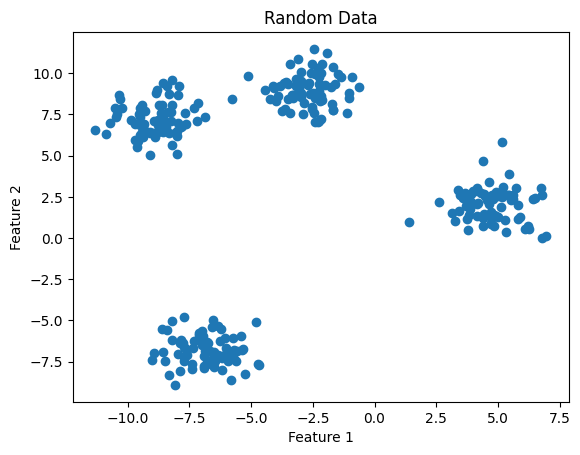

In [54]:
plt.scatter(X[:, 0], X[:, 1], cmap='viridis')
plt.title("Random Data")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

# This is an example, your answer might be different.

Good!   
Now we should compute the Affinity matrix.


### Understanding Affinity Matrix in Machine Learning
An affinity matrix, also known as a similarity matrix or kernel, is a concept used in machine learning, particularly within the realms of clustering and image segmentation. It is a powerful tool for identifying the structure within data by quantifying the similarity between pairs of data points. The affinity matrix plays a crucial role in algorithms such as spectral clustering and can be used to enhance the performance of methods that rely on the notion of data points being related or similar to one another.

### What is an Affinity Matrix?
An affinity matrix is a square, symmetric matrix used to represent the pairwise similarities between objects in a dataset. Each element of the matrix, denoted as A(i, j), represents a measure of similarity between the data point i and data point j. The diagonal elements of the matrix typically have the highest values, as they represent the similarity of each point with itself, which is usually the maximum possible similarity.

The specific definition of "similarity" can vary depending on the context and can be defined using various metrics such as Euclidean distance, cosine similarity, correlation, or other domain-specific measures. The choice of similarity measure directly influences the construction of the affinity matrix and, consequently, the performance of the machine learning algorithm utilizing it.

But there is a problem.

### How is an Affinity Matrix Constructed?
The construction of an affinity matrix involves the following steps:

Choose an appropriate similarity measure based on the nature of the data and the problem at hand.
Compute the pairwise similarities between all data points in the dataset using the chosen measure.
Fill the matrix with these similarity values, ensuring that the matrix is symmetric, i.e., $A(i, j) = A(j, i)$.    

Normalize the matrix if necessary, depending on the algorithm requirements.
For example, if the similarity measure is the Gaussian kernel, the affinity matrix A can be computed using the formula:

$$A(i, j) = exp(-gamma * ||x_i - x_j||^2)$$

where $||x_i - x_j||$ represents the Euclidean distance between data points $x_i$ and $x_j$, and gamma is a scaling parameter that controls the width of the Gaussian kernel.

You can read about kernels [here](https://en.wikipedia.org/wiki/Kernel_method)
In a short brief we can can say kernels are kind of function that computes a similarity measure between two data points in a high-dimensional space. Kernels are commonly used in support vector machines (SVMs) to map input data into a higher-dimensional space where it is easier to separate classes of data points. Kernels allow SVMs to efficiently perform complex classification tasks by implicitly mapping data points into a higher-dimensional space without explicitly calculating the transformed data points. This helps in capturing complex relationships in the data and making accurate predictions. Some common types of kernels include linear kernels, polynomial kernels, radial basis function (RBF) kernels, and sigmoid kernels.

#### Exericse 6.2
Lets construct affinity matrix

In [61]:
#TODO
# Use the formula that i provided before.
# Remember A is an square matrix not a vector
# Gamma value doesn't need to change, but if you want that, feel free to change.
gamma=1.0
A=...


# A.shape

(300, 300)

### Graph Laplacian
In mathematics and computer science, the graph Laplacian is a matrix representation of a graph that captures the relationships between its nodes. It is commonly used in spectral graph theory and machine learning for tasks such as clustering, dimensionality reduction, and semi-supervised learning.    
The graph Laplacian matrix plays a crucial role in spectral clustering algorithms, where the eigenvalues and eigenvectors of the Laplacian are used to partition the graph into clusters based on the graph's structure. It also helps in capturing the smoothness and connectivity of the graph, making it a powerful tool in various machine learning tasks that involve graph data.(More [info](https://csustan.csustan.edu/~tom/Clustering/GraphLaplacian-tutorial.pdf))

The Laplacian matrix is defined as follows:    
Given a graph $G := (V, E)$ where $V := \{v_1, v_2, \dots, v_n\}$ is the set of nodes/vertices and $E := \{e_1, e_2, \dots, e_m\}$ is the set of edges, with an adjacency matrix $A \in \{0,1\}^{n \times n}$, where

$$A_{i,j} := \begin{cases} 1,& \text{if there is an edge between} \ v_i \ \text{and} \ v_j \\ 0, & \text{otherwise}\end{cases}$$
and degree matrix $D \in \mathbb{Z}^{n \times n}$, where

$$D_{i,j} := \begin{cases} \text{degree}(v_i),& \text{if} \ i = j \\ 0, & \text{otherwise}\end{cases}$$
the Laplacian matrix is defined as

$$L := D - A$$
This definition is super simple, but it describes something quite deep: it’s the discrete analogue to the Laplacian operator on multivariate continuous functions. How does such a simple definition capture such a complex idea? We will demonstrate this in the remainder of this post.

#### Exercise 6.3
Now Let's generate Degree matrix. This can be a simple task.  
You just need to know several facts:
- Affinity matrix is a symmetric matrix.
- Each row(column) may represent a node.
- You can calculated the degree using a simple function.
- ```np.sum & np.diag```

In [76]:
D = ...



#### Exercise 6.4
Now Just simply calculated the laplacian matrix using $A$ and $D$

In [77]:
L=...

##### Exercise 6.4.1
We should now try to normalize the Laplacian matrix.
The goal of normalization is making the diagonal entries of the Laplacian matrix to be all unit, also scaling off-diagonal entries correspondingly. In a weighted graph, a vertex may have a large degree because of a small number of connected edges but with large weights just as well as due to a large number of connected edges with unit weights.      
 
A popular normalized spectral clustering technique is the normalized cuts algorithm or Shi–Malik algorithm introduced by Jianbo Shi and Jitendra Malik, commonly used for image segmentation. It partitions points into two sets $(B_1,B_2)$ based on the eigenvector $v$
corresponding to the second-smallest eigenvalue of the symmetric normalized Laplacian defined as $$L^{norm}=I-D^{-1/2}AD^{-1/2}$$

In [91]:
#TODO
#Create Normalized Laplacian matrix
L=...

### The sounds of Eigen
From an unseen realm, the arena emerges, a hidden stage for a grand drama. Yet, its true essence lies not in the spectacle itself, but in the silent whispers – the eigenvalues and eigenvectors – that orchestrate its phenomenal grace.


Now, It's time to feel nothing but an spectacular illusion of them.
Let's see how.


#### Exercise 6.5
In this section you should calculate the eigen vectors and eigen values of our Laplacian matrix.(You're able to use numpy built-in methods or your own method)

In [84]:
#TODO

eigenvalues, eigenvectors = ...


As long as the number of eigen vectors may be too many, we can select the first $K$ one of them.(K is the number of clusters, that you had been annonced earlier)    
> number of clusters is same as number of centers.

In [79]:
#TODO
k = ...  # Number of clusters
eigenvectors = eigenvectors[:, :k] 

# We select first k eigen vectors

After you've chosen those eigen vectors, it's time to use an algorithm named KMeans and apply that on our eigen vectors matrix.   
Let us review the algorithm one more time.

-------
[Basic Algorithm](https://en.wikipedia.org/wiki/Spectral_clustering)

- Calculate the Laplacian ${L}$ (or the normalized Laplacian)
- Calculate the first ${ k}$ eigenvectors (the eigenvectors corresponding to the 
$
{ k}$ smallest eigenvalues of 
$
{L}$)

- Consider the matrix formed by the first ${ k}$ eigenvectors; the $
{ l}^{th}$ row defines the features of graph node 
$
{l}$
- Cluster the graph nodes based on these features (e.g., using k-means clustering)


-------    


So, We should use K-means in order to complete our project.


/home/mreza/Desktop/Sources/IntroMl/qenv/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


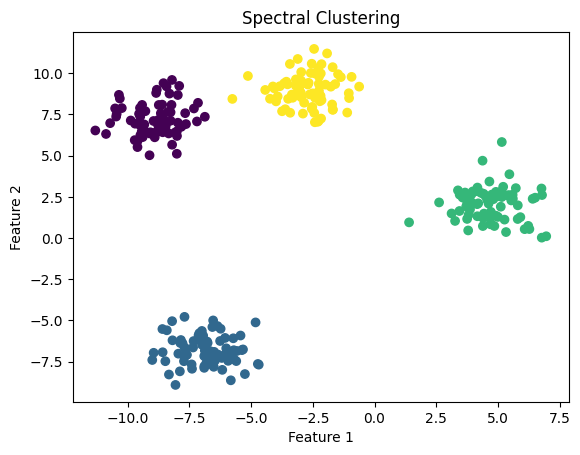

In [165]:
kmeans=KMeans(n_clusters=k).fit(eigenvectors)
labels = kmeans.labels_
plt.scatter(X[:, 0], X[:, 1], c=labels)
plt.title('My Spectral Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

If you see something like this, you should be proud of yourself because what you've done!

Finally we can checkout the built-in spectral clustering function in ```scikit-learn``` in order to see the true essence of grandeur!

#### Final Exercise:
Apply the spectral clustering on our data (matrix `X`)   
See the $?$ marks.

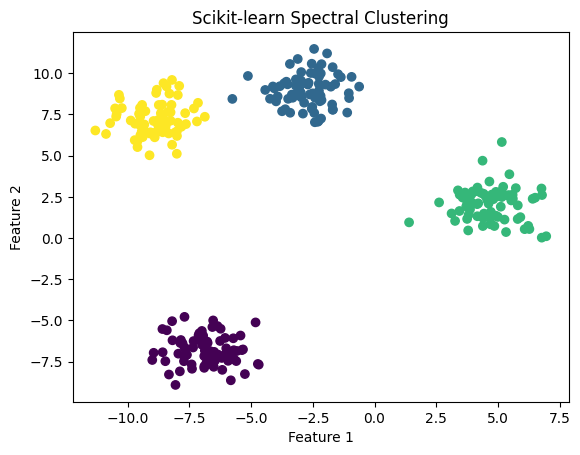

In [167]:
Spec = SpectralClustering(n_clusters=?,affinity="rbf" ,eigen_solver='arpack')
labels = Spec.fit_predict(?)
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis')
plt.title('Scikit-learn Spectral Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

--------------

# Data Selection through Spectral Analysis(Extra point)

### Attention:
    It's highly recommended not to run this part of the project on your local system. We need to train a deep learning model using PyTorch.
    So, feel free to use colab.research.google.com instead of your local machine

Alright,
In this part of the project, We are going to train a deep learning model using some criteria based on 


## Objective:
In this part, we will implement a simple data selection mechanism based on **graph theory** concepts, specifically the **Laplacian matrix** and the **Fiedler vector**. These tools will help us identify the most informative data points within a batch of data.

### Key Concepts:
1. **Laplacian Matrix**: A matrix representation of a graph that reflects the relationships between nodes (data points).
2. **Fiedler Vector**: The second smallest eigenvector of the Laplacian matrix, used to partition the graph into subsets of nodes.
3. **Filter Ratio**: We will use a filter ratio of 0.4, meaning we select the top 40% of the most informative data points in each batch.

### Workflow:
1. Generate or use a random dataset.
2. Calculate the **Laplacian matrix** for each batch of data.
3. Compute the **Fiedler vector** using `numpy`.
4. Use the Fiedler vector to select the top 40% of data points from each batch.
5. Train a simple neural network using the filtered data.



## Cell 2: Setup and Imports
We import the necessary libraries, including PyTorch for neural network training and `numpy` for linear algebra operations.


In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import numpy as np
import matplotlib.pyplot as plt

## Cell 3: Generate Random Dataset
We create a synthetic dataset of 2D points with binary labels. This dataset is used to simulate a simple classification task.


In [2]:
# Generate random 2D dataset
num_samples = 1000
X = np.random.rand(num_samples, 2)
y = (X[:, 0] + X[:, 1] > 1).astype(int)  # Binary labels based on a simple rule

# Convert to PyTorch tensors
X_tensor = torch.tensor(X, dtype=torch.float32)
y_tensor = torch.tensor(y, dtype=torch.long)

# Create DataLoader
dataset = TensorDataset(X_tensor, y_tensor)
data_loader = DataLoader(dataset, batch_size=50, shuffle=True)


## Cell 4: Define the Neural Network Model
We define a simple feedforward neural network to classify the data points.


In [3]:
class SimpleModel(nn.Module):
    def __init__(self):
        super(SimpleModel, self).__init__()
        self.hidden = nn.Linear(2, 16)
        self.output = nn.Linear(16, 2)
    
    def forward(self, x):
        x = torch.relu(self.hidden(x))
        x = self.output(x)
        return x

model = SimpleModel()


## Cell 5: Laplacian Matrix and Fiedler Vector Calculation

### Goal:
In this section, we calculate the **Laplacian Matrix** and the **Fiedler Vector**, which will be used to identify the most informative data points in each batch.

### Key Definitions:

#### 1. Affinity Matrix ($A$):
The Affinity Matrix represents the similarity between data points. Each element of $A$ is calculated as:
$$
A_{ij} = \exp\left(-\|x_i - x_j\|^2\right)
$$
where:
- $x_i$ and $x_j$ are feature vectors of data points $i$ and $j$, respectively.
- $\|\cdot\|$ denotes the Euclidean distance.

The Affinity Matrix is symmetric, with $A_{ii} = 1$ for all $i$.

---

#### 2. Degree Matrix ($D$):
The Degree Matrix is a diagonal matrix where each diagonal entry represents the sum of affinities for a specific data point:
$$
D_{ii} = \sum_{j} A_{ij}
$$
The off-diagonal elements of $D$ are all zero.

---

#### 3. Laplacian Matrix ($L$):
The Laplacian Matrix is derived as:
$$
L = D - A
$$
Here:
- $L$ captures the graph structure of the data.
- $L$ is positive semi-definite and symmetric.

---

#### 4. Fiedler Vector:
The **Fiedler Vector** is the eigenvector corresponding to the **second smallest eigenvalue** of the Laplacian Matrix. It plays a crucial role in graph partitioning and identifies the most significant directions in the data.

---

### Steps:
1. Compute the Affinity Matrix ($A$) for the given batch of data.
2. Derive the Degree Matrix ($D$) from $A$.
3. Calculate the Laplacian Matrix ($L$).
4. Perform eigen decomposition on $L$ to extract eigenvalues and eigenvectors.
5. Use the second smallest eigenvector (Fiedler Vector) to rank the data points.

---

### Student Task:
You will implement the `calculate_fiedler_vector` function. Specifically, you will:
1. Construct the Affinity Matrix ($A$) using pairwise Euclidean distances.
2. Compute the Degree Matrix ($D$).
3. Derive the Laplacian Matrix ($L$).
4. Use **`numpy`** to calculate the eigenvalues and eigenvectors of $L$.
5. Extract the Fiedler Vector and use it to filter the data.

Use this information as a guide for completing the implementation.


In [5]:
def calculate_fiedler_vector(batch_data):
    """
    Calculate the Laplacian matrix and Fiedler vector for the given data batch.
    Args:
        batch_data: A numpy array of shape (batch_size, num_features).
    Returns:
        indices: Indices of the most informative data points based on the Fiedler vector.
    """
    batch_size = batch_data.shape[0]
    
    # Step 1: Construct the Affinity Matrix (students should complete this)
    # Hint: Use the Euclidean distance between points
    affinity_matrix = ...
    degree_matrix = ...
    
    laplacian_matrix = ...
    
    eigenvalues, eigenvectors = ...
    
    fiedler_vector = ...  # Second eigenvector

    # Step 6: Sort data points based on Fiedler vector values
    sorted_indices = np.argsort(fiedler_vector)
    selected_count = int(0.4 * batch_size)  
    selected_indices = sorted_indices[:selected_count]

    return selected_indices


## Cell 6: Training Loop
This training loop uses the `calculate_fiedler_vector` function to filter data points within each batch based on the Fiedler vector. Only the selected data points are used for training.


In [6]:
# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

# Training loop
num_epochs = 10
for epoch in range(num_epochs):
    for batch_idx, (data, labels) in enumerate(data_loader):
        # Convert data to numpy for Fiedler vector calculation
        data_np = data.numpy()
        selected_indices = calculate_fiedler_vector(data_np)
        
        # Select the most informative data points
        selected_data = data[selected_indices]
        selected_labels = labels[selected_indices]

        # Forward pass
        outputs = model(selected_data)
        loss = criterion(outputs, selected_labels)

        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    
    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}")


Epoch [1/10], Loss: 0.7199
Epoch [2/10], Loss: 0.6158
Epoch [3/10], Loss: 0.6427
Epoch [4/10], Loss: 0.6538
Epoch [5/10], Loss: 0.6376
Epoch [6/10], Loss: 0.6838
Epoch [7/10], Loss: 0.6246
Epoch [8/10], Loss: 0.5745
Epoch [9/10], Loss: 0.5588
Epoch [10/10], Loss: 0.5399


## Cell 7: Visualizing Results
We plot the decision boundary learned by the model along with the original dataset to visualize the classification results.


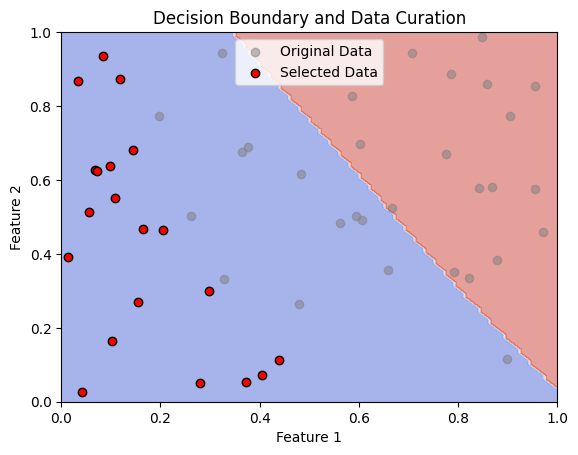

In [8]:
# Generate a grid of points for decision boundary visualization
xx, yy = torch.meshgrid(torch.linspace(0, 1, 100), torch.linspace(0, 1, 100))
grid = torch.cat([xx.reshape(-1, 1), yy.reshape(-1, 1)], dim=1)

# Predict labels for grid points
with torch.no_grad():
    predictions = model(grid).argmax(dim=1).reshape(100, 100)

# Visualize the original dataset and the filtered data
for batch_idx, (data, labels) in enumerate(data_loader):
    # Select a single batch
    data_np = data.numpy()
    selected_indices = calculate_fiedler_vector(data_np)
    
    # Extract filtered data
    selected_data = data[selected_indices]
    selected_labels = labels[selected_indices]
    
    # Plot the decision boundary
    plt.contourf(xx.numpy(), yy.numpy(), predictions.numpy(), alpha=0.5, cmap="coolwarm")
    
    # Plot original data points
    plt.scatter(data_np[:, 0], data_np[:, 1], c="gray", alpha=0.5, label="Original Data")
    
    # Highlight selected (filtered) data points
    plt.scatter(
        selected_data[:, 0], selected_data[:, 1], c="red", label="Selected Data", edgecolors="k"
    )
    
    # Add plot details
    plt.title("Decision Boundary and Data Curation")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.legend()
    plt.show()
    
    # Only visualize the first batch
    break


-----

      
# ```Congratulations!```    
You have successfully completed the project!   🎉🎉    

wish you nothing but the best and good luck.✌️✌️